In [21]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install xgboost
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.8 MB 8.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/7.8 MB 9.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.6 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 7.0 MB/s eta 0:00:00


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, hinge_loss

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("breast-cancer.csv")
df.head(10)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [7]:
# train-test split
num_columns = len(df.axes[1])
X = df.iloc[:,:num_columns-1]
y = df["Class"]

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [110]:
# KNN
# her k için cross val yap, her folddan gelen kayıp skoru dizisinin ortalamasını alıp en iyi ortalamayı veren k yi kabul et
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
for i in k:
    model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(model, X, y, scoring='neg_log_loss', cv=5)
    print(i, ":", -np.mean(scores))

model = KNeighborsClassifier(n_neighbors=25, metric='cosine', weights='distance')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
loss_score = log_loss(y_test, y_pred_proba)
print("Test loss after training: ", loss_score)

1 : 16.88433913590675
3 : 7.125714647841406
5 : 4.378792866085576
7 : 3.181464446534064
9 : 2.6414797804540697
11 : 2.380540845700591
13 : 2.123494985197586
15 : 1.433734381468306
17 : 1.2844212551346572
19 : 1.0361750523454258
21 : 1.0283770945505442
23 : 0.9738567319391536
25 : 0.9630572124364996
27 : 0.9544365182172024
Test loss after training:  0.16284446119776033


In [61]:
#DT
model = DecisionTreeClassifier(max_leaf_nodes=3,random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
loss_score = log_loss(y_test, y_pred_proba)
print("Test loss after training:", loss_score)

Test loss after training: 0.23127177979767252


In [62]:
# GridSearch hyperparameter optimization for Random Forest Classifier
params = {
    "n_estimators":[25,50,100,150],
    "max_depth":[3,6,9],
    "max_leaf_nodes":[2,3,4,5,6]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

C:\Users\akife\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestClassifier(max_depth=3, max_leaf_nodes=3, n_estimators=150)


In [18]:
#RF
model = RandomForestClassifier(criterion='log_loss',random_state=42, max_depth=3, max_leaf_nodes=3, n_estimators=150)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
score = log_loss(y_test, y_pred_proba)
print("Loss score:", score)

Loss score: 0.16053414876859767


In [114]:
# GridSearch hyperparameter optimization for XGBoost
params = {
    "n_estimators":[25,50,75,100,150],
    "max_depth":[3,6,9,12],
    "max_leaves":[10,20,30,50,100]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid=params)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


score: 0.9416058394160584


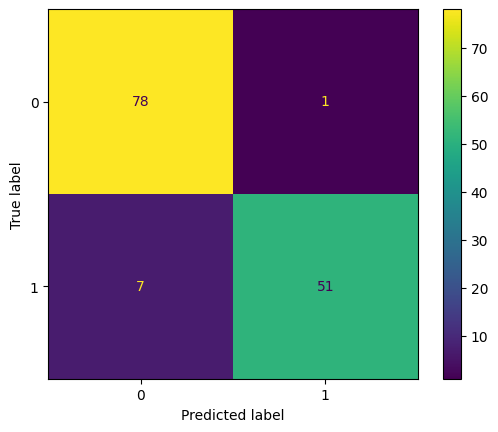

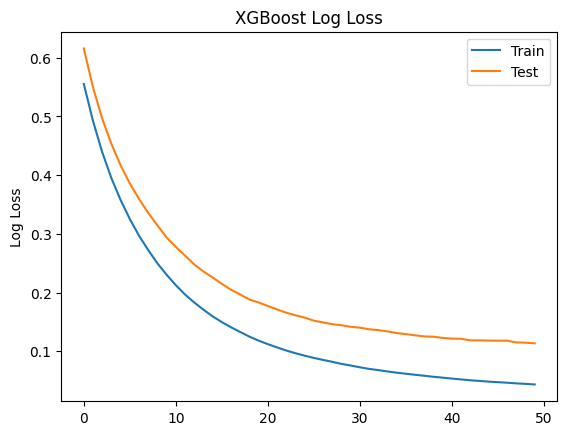

In [41]:
# XGBoost
model = XGBClassifier(learning_rate=0.1,n_estimators=50, max_depth=3, max_leaves=10, random_state=42, eval_metric=["error","logloss"], early_stopping_rounds=5)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred) # reg squared, precision ve recall bakılabilir
print("score:", score)
# confusion matrix çıkar
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot()

# plot train-test error
results = model.evals_result()
epochs = len(results["validation_0"]["error"])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [30]:
#SVC - hinge loss
model = SVC(kernel='poly', degree=10, random_state=42,)
model.fit(X_train, y_train)
pred_decision = model.decision_function(X_test)
score = hinge_loss(y_test, pred_decision)
print("score:", score)

score: 0.8467154265879485
